# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
# Load the Dataset
mydata = pd.read_csv('/content/drive/MyDrive/MIT/Convert_to_html/ExtraaLearn.csv')

In [ ]:
extra_lrn = mydata.copy()

In [ ]:
extra_lrn.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
extra_lrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- The dataset contains 15 columns and 4612 entries. There are 5 numeric columns; age, website_visits, time_spent_on_website, and status. All the other columns are non-numeric.

In [ ]:
print(extra_lrn.duplicated().sum())

0


- The data has no duplicate entries.

In [ ]:
numeric_cols = extra_lrn.select_dtypes(include=['number'])
numeric_cols.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


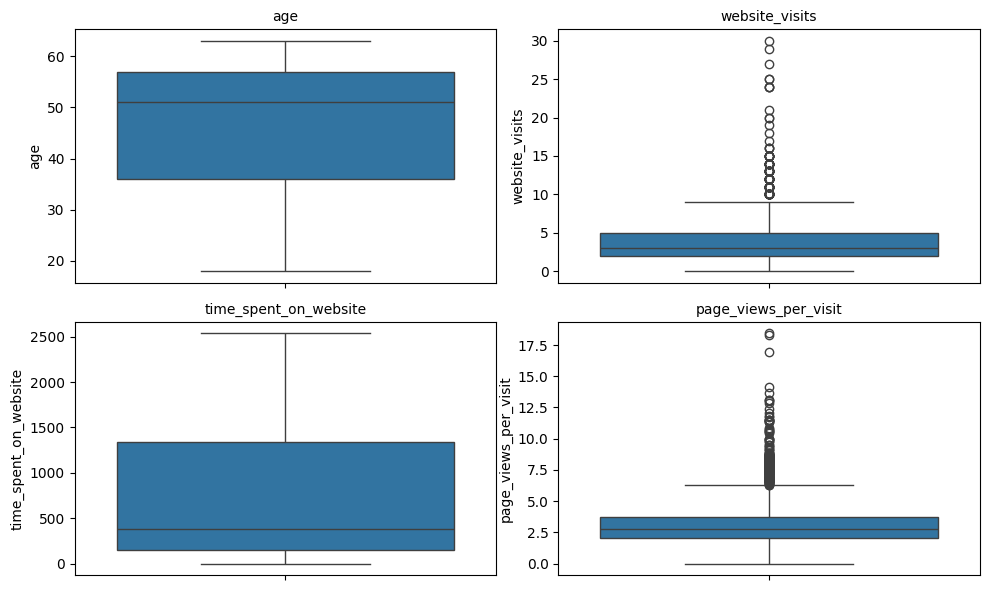

In [ ]:
selected_cols = numeric_cols.columns[:4] #removing hte column 'status'
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) #size for the plots
axes = axes.flatten()

for i, col in enumerate(selected_cols): #making the boxplots
    sns.boxplot(y=extra_lrn[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

- The distribution of **age** is fairly symmetric, with a median around 51 years. Most leads fall between the ages of 35 and 60, and there are no significant outliers in this column.

- The distribution of **website visits** is right-skewed, indicating that most leads visit the website only a few times, while a small number make significantly more visits. The presence of outliers suggests a subset of highly engaged users.

- The distribution of **time spent on the website** is heavily right-skewed, with most users spending less than 500 seconds. However, the range extends up to approximately 2,500 seconds, showing that some users engage with the site for significantly longer periods.

- The distribution of **page views per visit** is also strongly right-skewed, with most leads viewing only a few pages per session. Outliers show that some users view over 18 pages in a single visit, suggesting intense browsing behavior from a small group of highly curious or motivated users.

In [ ]:
non_numeric_cols = extra_lrn.select_dtypes(exclude=np.number).columns
extra_lrn[non_numeric_cols].describe().T

,count,unique,top,freq
ID,4612,4612,EXT4612,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


This dataset contains 10 non-numeric columns, all of which have no missing values, as previously noted. Most of these columns contain only 2 to 3 unique values. The ID column has 4,612 unique entries, which is expected since each lead is assigned a unique identifier. Additionally, the most frequently occurring values in each column are clearly identifiable—many columns have a top category that appears in roughly 50% of the entries, while in some cases, the dominant category appears even more frequently.

In [ ]:
# creating a subset of the data for leads that were converted into paid customers
paid_data = extra_lrn[extra_lrn['status'] == 1]
paid_data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
10,EXT011,52,Professional,Website,Medium,2,433,2.140,Email Activity,No,No,No,No,No,1


In [ ]:
numeric_paid_data = paid_data.select_dtypes(include=['number'])
numeric_paid_data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.0
mean,48.663762,3.538126,1068.397967,3.027050,1.0
std,11.293692,2.721075,780.856643,1.896893,0.0
min,18.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,2.000000,390.000000,2.083000,1.0
50%,54.000000,3.000000,789.000000,2.935000,1.0
75%,58.000000,5.000000,1829.000000,3.730000,1.0
max,63.000000,25.000000,2537.000000,13.656000,1.0


In [ ]:
selected_cols_2 = numeric_paid_data.columns[:4] #removing the column 'status'

In [ ]:
#unpaid data
unpaid_data = extra_lrn[extra_lrn['status'] == 0]
unpaid_data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0


In [ ]:
numeric_unpaid_data = unpaid_data.select_dtypes(include=['number'])
numeric_unpaid_data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,3235.000000,3235.000000,3235.000000,3235.000000,3235.0
mean,45.153014,3.578980,577.420711,3.025732,0.0
std,13.748843,2.874222,676.340484,1.997962,0.0
min,18.000000,0.000000,0.000000,0.000000,0.0
25%,33.000000,2.000000,88.000000,2.074500,0.0
50%,49.000000,3.000000,317.000000,2.706000,0.0
75%,57.000000,5.000000,646.000000,3.773500,0.0
max,63.000000,30.000000,2531.000000,18.434000,0.0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

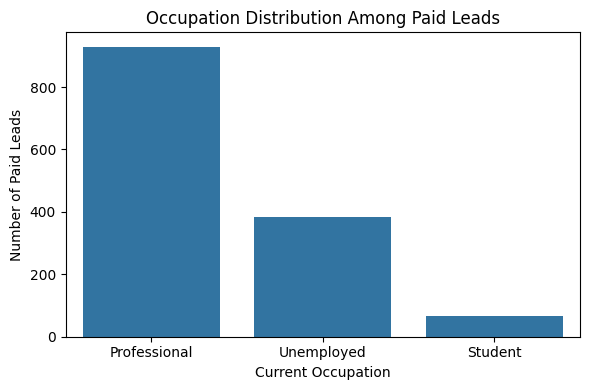

In [ ]:
# Does occupation affect lead status
plt.figure(figsize=(6, 4))
sns.countplot(data=paid_data, x='current_occupation', order=paid_data['current_occupation'].value_counts().index)
plt.title('Occupation Distribution Among Paid Leads')
plt.xlabel('Current Occupation')
plt.ylabel('Number of Paid Leads')
plt.tight_layout()
plt.show()


In [ ]:
conversion_by_occupation = (
    extra_lrn.groupby('current_occupation')['status']
    .agg(total_leads='count', paid_leads='sum')
    .reset_index()
)
conversion_by_occupation['conversion_rate (%)'] = (
    conversion_by_occupation['paid_leads'] / conversion_by_occupation['total_leads'] * 100
).round(2)
print(conversion_by_occupation)

  current_occupation  total_leads  paid_leads  conversion_rate (%)
0       Professional         2616         929                35.51
1            Student          555          65                11.71
2         Unemployed         1441         383                26.58


- The bar plot above shows that the majority of paid leads are professionals, followed by unemployed individuals, and then students. Given the clear differences in conversion among these groups, it is reasonable to conclude that occupation does, in fact, influence lead status.

- Additionally, the conversion rate for professionals is higher than that of both unemployed individuals and students, indicating that professionals are not only more likely to engage, but also more likely to follow through and become paying customers. This may reflect their greater financial stability, clearer upskilling goals, or a stronger perceived value in ExtraaLearn’s offerings.

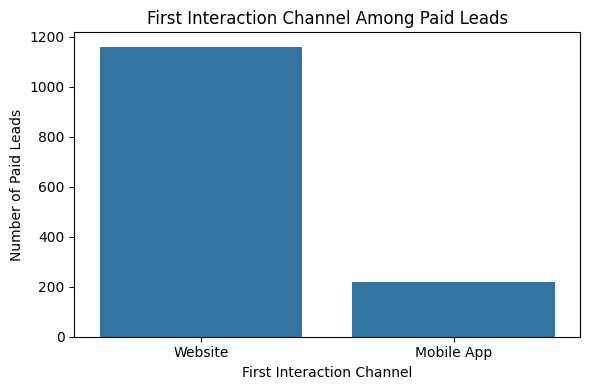

In [ ]:
# Do the first channels of interaction have an impact on the lead status?
plt.figure(figsize=(6, 4))
sns.countplot(data=paid_data, x='first_interaction', order=paid_data['first_interaction'].value_counts().index)
plt.title('First Interaction Channel Among Paid Leads')
plt.xlabel('First Interaction Channel')
plt.ylabel('Number of Paid Leads')
plt.tight_layout()
plt.show()

In [ ]:
conversion_by_channel = (
    extra_lrn.groupby('first_interaction')['status']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_leads', 'sum': 'paid_leads'})
)
conversion_by_channel['conversion_rate'] = (conversion_by_channel['paid_leads'] / conversion_by_channel['total_leads']) * 100
print(conversion_by_channel)


                   total_leads  paid_leads  conversion_rate
first_interaction                                          
Mobile App                2070         218        10.531401
Website                   2542        1159        45.594020


- The plot above shows the number of paid customers based on their first interaction channel. There is a clear distinction between leads who first interacted via the website and those who used the mobile app. A significantly larger number of paid customers initially engaged through the website, suggesting that the first interaction channel does impact conversion.

- Additionally, the conversion rate for website interactions is approximately 45%, compared to just 10% for mobile app interactions. This indicates that not only do more paying customers come through the website, but leads who begin their journey on the website are also far more likely to convert. This insight suggests that the website may be a more effective and persuasive platform for engaging potential customers.

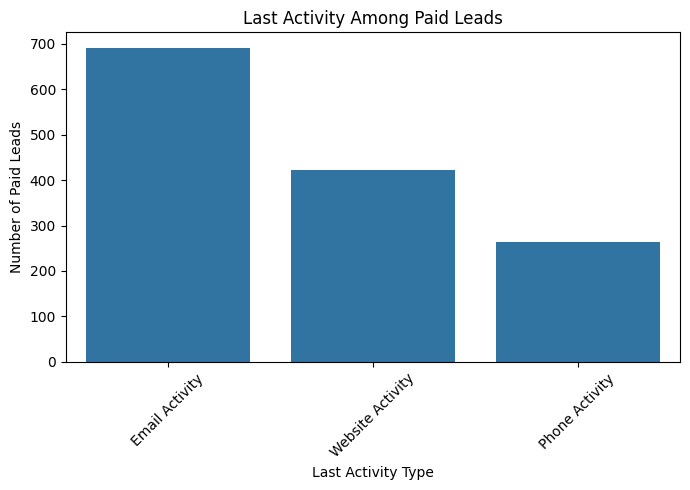

In [ ]:
# Which way of interaction works best?
plt.figure(figsize=(7, 5))
sns.countplot(data=paid_data, x='last_activity', order=paid_data['last_activity'].value_counts().index)
plt.title('Last Activity Among Paid Leads')
plt.xlabel('Last Activity Type')
plt.ylabel('Number of Paid Leads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
conversion_by_last_activity = (
    extra_lrn.groupby('last_activity')['status']
    .agg(total_leads='count', paid_leads='sum')
    .reset_index()
)
conversion_by_last_activity['conversion_rate (%)'] = (
    conversion_by_last_activity['paid_leads'] / conversion_by_last_activity['total_leads'] * 100
).round(2)

print(conversion_by_last_activity)


      last_activity  total_leads  paid_leads  conversion_rate (%)
0    Email Activity         2278         691                30.33
1    Phone Activity         1234         263                21.31
2  Website Activity         1100         423                38.45


- The initial plot shows that the majority of paid customers had their last interaction via email activity, followed by website activity, and then phone activity. This suggests that email may play a key role in finalizing the conversion process.

- However, when looking at conversion rates, website activity stands out with the highest conversion rate at 38.45%. This means that among all leads whose last interaction was on the website, over a third converted into paying customers. While email is more common among converters, website activity appears to be the most effective in terms of conversion efficiency.

In [ ]:
# Which of these channels have the highest lead conversion rate?
media_channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

conversion_summary = []

for col in media_channels:
    grouped = (
        extra_lrn.groupby(col)['status']
        .agg(total_leads='count', paid_leads='sum')
        .reset_index()
    )
    grouped['conversion_rate (%)'] = (grouped['paid_leads'] / grouped['total_leads'] * 100).round(2)

    # Only keep "Yes" responses
    grouped = grouped[grouped[col] == 'Yes'].copy()
    grouped.insert(0, 'channel', col)
    grouped.rename(columns={col: 'response'}, inplace=True)

    conversion_summary.append(grouped)

# Combine all cleanly
final_yes_df = pd.concat(conversion_summary, ignore_index=True)
print(final_yes_df)



                channel response  total_leads  paid_leads  conversion_rate (%)
0     print_media_type1      Yes          497         159                31.99
1     print_media_type2      Yes          233          75                32.19
2         digital_media      Yes          527         168                31.88
3  educational_channels      Yes          705         197                27.94
4              referral      Yes           93          63                67.74


- Referrals have the highest conversion rate at 67.74%, making them the most effective channel for turning leads into paying customers. This is followed by magazines (print_media_type2), which have the second-highest conversion rate, though it's significantly lower.

- It's important to note that educational channels and digital media account for the highest number of total leads, indicating broader reach. However, when it comes to actual conversions, referrals stand out — likely because individuals are more inclined to trust recommendations from people they know.

- The substantial gap between referrals and all other channels, particularly magazines, highlights the power of word-of-mouth marketing and suggests that building referral-based strategies could be highly beneficial for ExtraaLearn’s growth.

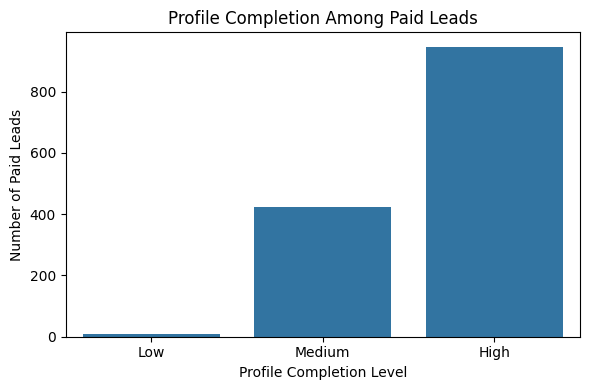

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=paid_data, x='profile_completed', order=['Low', 'Medium', 'High'])
plt.title('Profile Completion Among Paid Leads')
plt.xlabel('Profile Completion Level')
plt.ylabel('Number of Paid Leads')
plt.tight_layout()
plt.show()

In [ ]:
conversion_by_profile = (
    extra_lrn.groupby('profile_completed')['status']
    .agg(total_leads='count', paid_leads='sum')
    .reset_index()
)
conversion_by_profile['conversion_rate (%)'] = (
    conversion_by_profile['paid_leads'] / conversion_by_profile['total_leads'] * 100
).round(2)

print(conversion_by_profile)


  profile_completed  total_leads  paid_leads  conversion_rate (%)
0              High         2264         946                41.78
1               Low          107           8                 7.48
2            Medium         2241         423                18.88


- The highest number of paid leads come from individuals with high profile completion levels, suggesting that leads who convert to paying customers are typically those who provide more detailed information. This trend is also reflected in the conversion rates, where the high profile completion group has the highest rate at 41.78%.

- This indicates that the more information a lead provides, the more likely they are to convert, possibly because higher profile completion reflects stronger interest, trust, or readiness to engage. It also enables the sales team to personalize outreach more effectively, further increasing the chances of conversion.

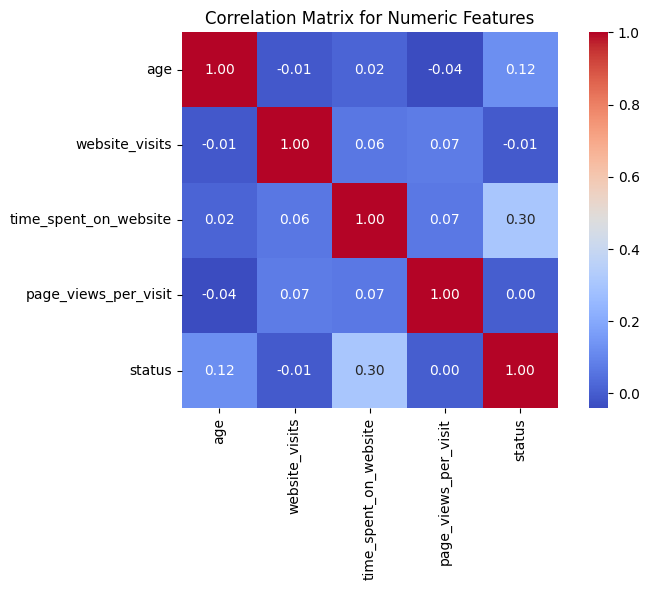

In [ ]:
# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Numeric Features')
plt.tight_layout()
plt.show()


The multicollinearity table does not show any strong correlations among the variables. I typically use a cutoff of ±0.7 to indicate potential multicollinearity concerns, and none of the values in the correlation matrix approach that threshold. Therefore, I can confidently move forward with modeling without needing to address multicollinearity at this stage.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

- There are no missing values!

In [ ]:
# One-hot encode
# Encoding the categorical variables first_interaction and current_occupation
extra_encoded = pd.get_dummies(extra_lrn, columns=['first_interaction', 'current_occupation'], drop_first=True)

# This turns the newly created variables, boolean variables, into 0 or 1
extra_encoded = extra_encoded.astype({col: int for col in extra_encoded.select_dtypes('bool').columns})

In [ ]:
extra_encoded.head()

,ID,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,first_interaction_Website,current_occupation_Student,current_occupation_Unemployed
0,EXT001,57,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1,1,0,1
1,EXT002,56,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0,0,0,0
2,EXT003,52,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0,1,0,0
3,EXT004,53,High,4,464,2.057,Website Activity,No,No,No,No,No,1,1,0,1
4,EXT005,23,High,4,600,16.914,Email Activity,No,No,No,No,No,0,1,1,0


In the feature engineering step above, I encoded the first_interaction and current_occupation columns because they are categorical variables. For first_interaction, which has two categories (e.g., "Website" and "Mobile App"), one new column was created: first_interaction_Website. A value of 1 indicates the lead first interacted via the website, while a 0 implies the interaction was through the mobile app.

Similarly, for current_occupation, multiple binary columns were created to represent each occupation category. In both cases, one category was dropped using drop_first=True to avoid multicollinearity when modeling.

In [ ]:
#Ordinal encode profile_completed
profile_map = {'Low': 1, 'Medium': 2, 'High': 3}
extra_encoded['profile_completed'] = extra_lrn['profile_completed'].map(profile_map)

In [ ]:
extra_encoded.head()

,ID,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,first_interaction_Website,current_occupation_Student,current_occupation_Unemployed
0,EXT001,57,3,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1,1,0,1
1,EXT002,56,2,2,83,0.320,Website Activity,No,No,No,Yes,No,0,0,0,0
2,EXT003,52,2,3,330,0.074,Website Activity,No,No,Yes,No,No,0,1,0,0
3,EXT004,53,3,4,464,2.057,Website Activity,No,No,No,No,No,1,1,0,1
4,EXT005,23,3,4,600,16.914,Email Activity,No,No,No,No,No,0,1,1,0


Here, I performed feature engineering on the profile_completed column to ensure it is in a numeric format. Since this is an ordinal variable with levels (Low, Medium, High), I used ordinal encoding by mapping the categories to increasing numeric values (1 to 3). Unlike one-hot encoding, this method retains the natural order of the categories and results in a single numeric column instead of multiple binary columns.

In [ ]:
binary_map = {'Yes': 1, 'No': 0}
binary_cols = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
extra_encoded[binary_cols] = extra_encoded[binary_cols].replace(binary_map)

/tmp/ipython-input-4217164439.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  extra_encoded[binary_cols] = extra_encoded[binary_cols].replace(binary_map)


In [ ]:
extra_encoded.head()

,ID,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,first_interaction_Website,current_occupation_Student,current_occupation_Unemployed
0,EXT001,57,3,7,1639,1.861,Website Activity,1,0,1,0,0,1,1,0,1
1,EXT002,56,2,2,83,0.320,Website Activity,0,0,0,1,0,0,0,0,0
2,EXT003,52,2,3,330,0.074,Website Activity,0,0,1,0,0,0,1,0,0
3,EXT004,53,3,4,464,2.057,Website Activity,0,0,0,0,0,1,1,0,1
4,EXT005,23,3,4,600,16.914,Email Activity,0,0,0,0,0,0,1,1,0


In [ ]:
extra_encoded = pd.get_dummies(extra_encoded, columns=['last_activity'], drop_first=True)


In [ ]:
extra_encoded = extra_encoded.astype({col: int for col in extra_encoded.select_dtypes('bool').columns})

In [ ]:
extra_encoded = extra_encoded.drop(columns = ['ID'])

In [ ]:
extra_encoded.head()

,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,first_interaction_Website,current_occupation_Student,current_occupation_Unemployed,last_activity_Phone Activity,last_activity_Website Activity
0,57,3,7,1639,1.861,1,0,1,0,0,1,1,0,1,0,1
1,56,2,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1
2,52,2,3,330,0.074,0,0,1,0,0,0,1,0,0,0,1
3,53,3,4,464,2.057,0,0,0,0,0,1,1,0,1,0,1
4,23,3,4,600,16.914,0,0,0,0,0,0,1,1,0,0,0


More of the same feature engineering steps were taken for other columns.

**OUTLIERS**
- Although there are outliers present in some of the numerical features, I have chosen not to remove them. This is because many of these outliers likely represent valid user behavior rather than data entry errors—for example, highly engaged leads who spent significant time on the website or visited it many times. Since the goal of this project is predictive modeling rather than inference, and because decision trees are robust to outliers, removing them could result in the loss of valuable information that helps identify high-converting leads.

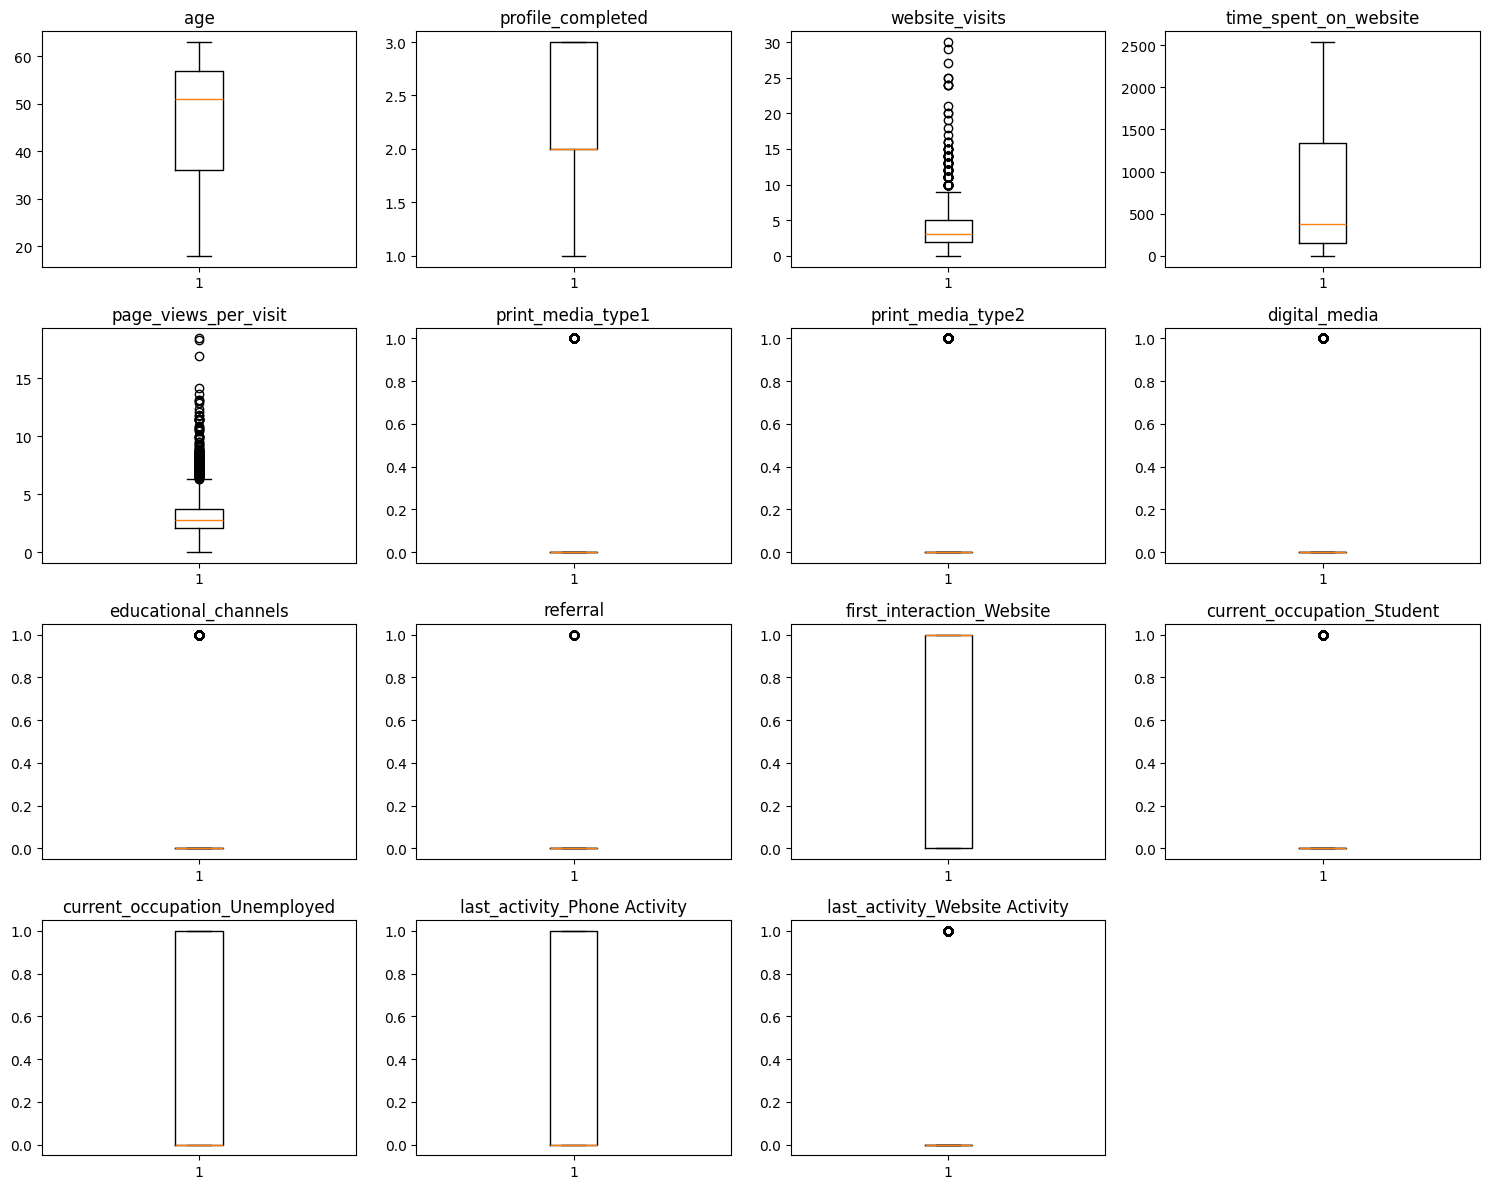

In [ ]:
# outlier detection using boxplot
numeric_columns = extra_encoded.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(extra_encoded[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
#Splitting the data into the test adn train groups

# Define features (X) and target (y)
X = extra_encoded.drop(columns=['status'], errors='ignore')
y = extra_encoded['status']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building a Decision Tree model

In [ ]:
# Initialize and train tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

## Model Performance evaluation and improvement

In [ ]:
print("Training Set Performance")

y_pred_train = tree_model.predict(X_train)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nDecision Tree Classification Report:")
print(classification_report(y_train, y_pred_train))

Training Set Performance
Decision Tree Confusion Matrix:
[[2201  385]
 [ 186  917]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2586
           1       0.70      0.83      0.76      1103

    accuracy                           0.85      3689
   macro avg       0.81      0.84      0.82      3689
weighted avg       0.86      0.85      0.85      3689



- The results on the test set are promising, with an overall F1 score of 85%, indicating strong predictive performance. The model also performs relatively well on class 1 (converted leads), achieving an F1 score of 76%, with precision of 70% and recall of 83%.

- The recall of 83% means that the model correctly identifies 83% of all actual paid customers. This is important in business contexts where missing a potential conversion can mean lost revenue.

- The precision of 70% means that 70% of the leads predicted as “converted” actually did convert. This reflects how many of the model's positive predictions are truly correct.

In [ ]:
print("Test Set Performance")
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Test Set Performance
Decision Tree Confusion Matrix:
[[560  89]
 [ 42 232]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       649
           1       0.72      0.85      0.78       274

    accuracy                           0.86       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.87      0.86      0.86       923



The model's performance on the test set is strong, achieving an accuracy of 86%, which is slightly higher than on the training set. This suggests that overfitting is not a concern, and the model generalizes well to unseen data.

Performance on class 1 (converted leads) is also solid, with an F1 score of 78%, precision of 72%, and recall of 86%—all of which are improvements over the training set.

The recall of 86% indicates that the model correctly identifies 86% of actual paid customers, which is valuable for ensuring potential conversions aren't missed.

The precision of 72% means that 72% of the leads predicted as paid customers actually converted, implying a false positive rate of about 28%.

These results suggest the model is both accurate and practical for identifying high-quality leads for further engagement.

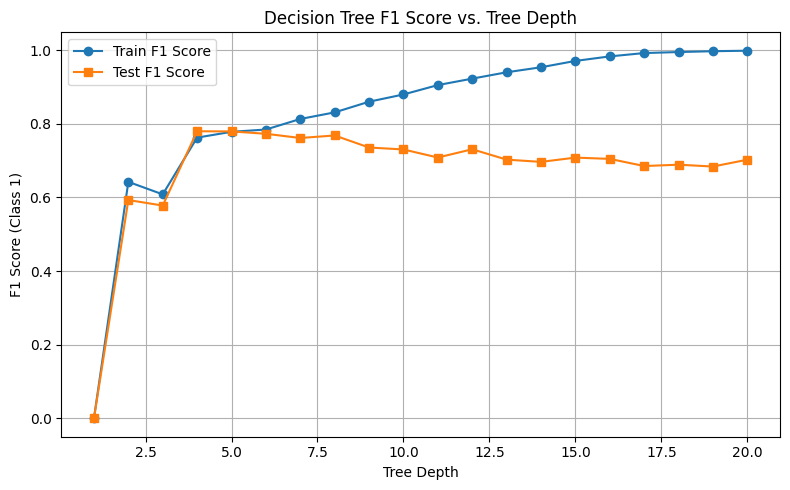

In [ ]:
train_scores = []
test_scores = []
depth_range = range(1, 21)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)

    train_scores.append(train_f1)
    test_scores.append(test_f1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(depth_range, train_scores, label='Train F1 Score', marker='o')
plt.plot(depth_range, test_scores, label='Test F1 Score', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score (Class 1)')
plt.title('Decision Tree F1 Score vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- The graph shows that the F1 score on the training set increases steadily as tree depth increases, eventually reaching nearly perfect performance. This indicates that the model is learning the training data extremely well — perhaps too well — which is a sign of overfitting at deeper depths.

- Meanwhile, the F1 score on the test set improves initially, peaking around a depth of 5 or 6, and then begins to decline or flatten. This suggests that while deeper trees continue to fit the training data more precisely, they begin to capture noise rather than useful patterns, leading to reduced generalization on unseen data.



/tmp/ipython-input-758926465.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')


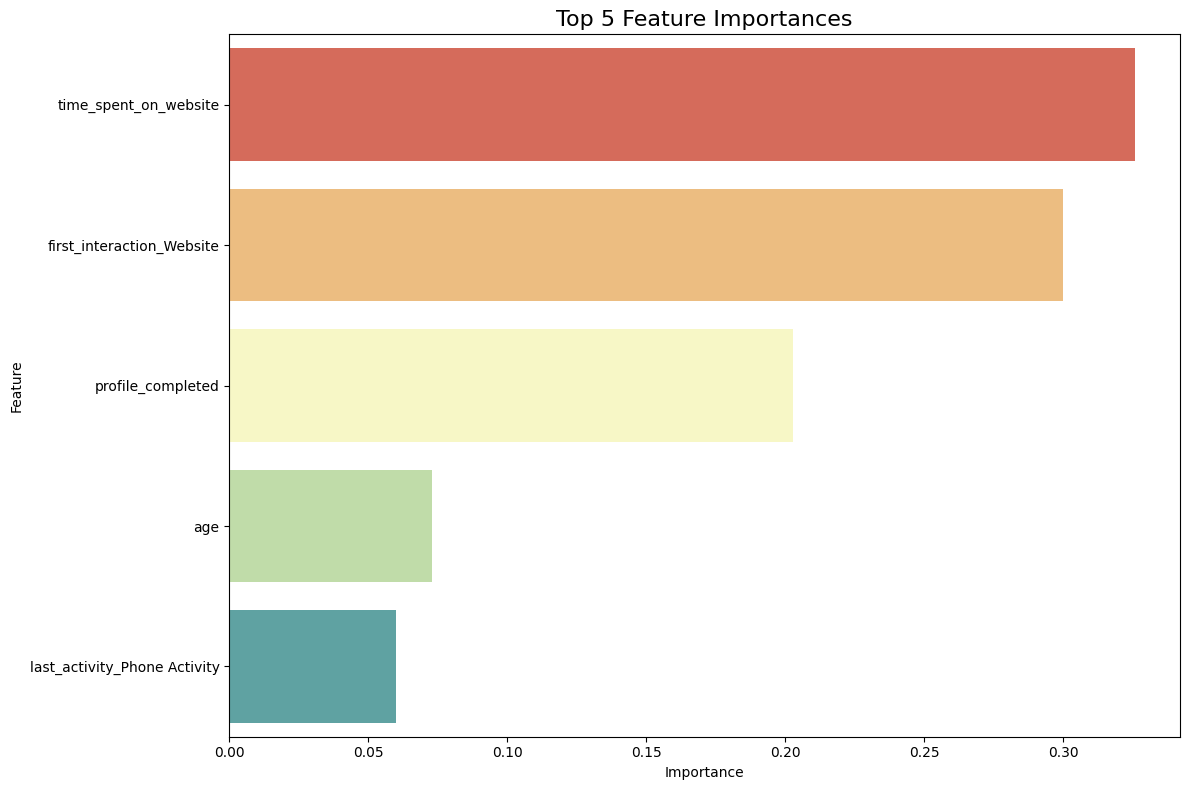

In [ ]:
features = X_train.columns
importances = tree_model.feature_importances_

# Create dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df.head(5)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')
plt.title('Top 5 Feature Importances', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The plot above displays the top 5 most important features in the decision tree model. According to the feature importance scores, the factors that contribute most to predicting whether a lead will convert to a paid customer are:

1. Time spent on the website – the most influential feature, suggesting that more engaged users are more likely to convert.

2. First interaction via website – indicating that leads who first engage through the website tend to be higher quality.

3. Profile completion – showing that leads who provide more personal information are more likely to convert.

4. Age – contributing moderately, possibly reflecting target demographics.

5. Last activity being a phone interaction – suggesting that phone-based follow-ups may influence conversion likelihood.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_leaf': [1, 2, 4, 5, 10]
}

# Initialize model
tree_model_opt = DecisionTreeClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=tree_model_opt, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
Best F1 Score: 0.7595268794193049


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Use best estimator from grid search
best_tree = grid_search.best_estimator_

# Predictions
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Training Set Evaluation
print("Training Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Set Confusion Matrix:
[[2341  245]
 [ 250  853]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2586
           1       0.78      0.77      0.78      1103

    accuracy                           0.87      3689
   macro avg       0.84      0.84      0.84      3689
weighted avg       0.87      0.87      0.87      3689



- The optimized version of the decision tree model demonstrates strong performance. On the training set, the overall F1 score is 87%, indicating robust predictive capability. For class 1 (converted leads), the model achieves an F1 score of 78%, with both precision and recall at 78% and 77%, respectively.
- Notably, the precision and F1 score for class 1 are higher than in the non-optimized model, suggesting that hyperparameter tuning has improved the model.

In [ ]:
# Test Set Evaluation
print("\nTest Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Set Confusion Matrix:
[[593  56]
 [ 61 213]]

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       649
           1       0.79      0.78      0.78       274

    accuracy                           0.87       923
   macro avg       0.85      0.85      0.85       923
weighted avg       0.87      0.87      0.87       923



- The model also demonstrates strong performance on the test set, achieving an overall F1 score of 87%, which is an improvement over the non-optimized model. Performance on class 1 (converted leads) is also impressive, with an F1 score of 78%, precision of 79%, and recall of 78%.
- These metrics are not only strong, but also closely aligned with the training set results- in fact, slightly better—suggesting that the model generalizes well and is not overfitting.

/tmp/ipython-input-1358691253.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')


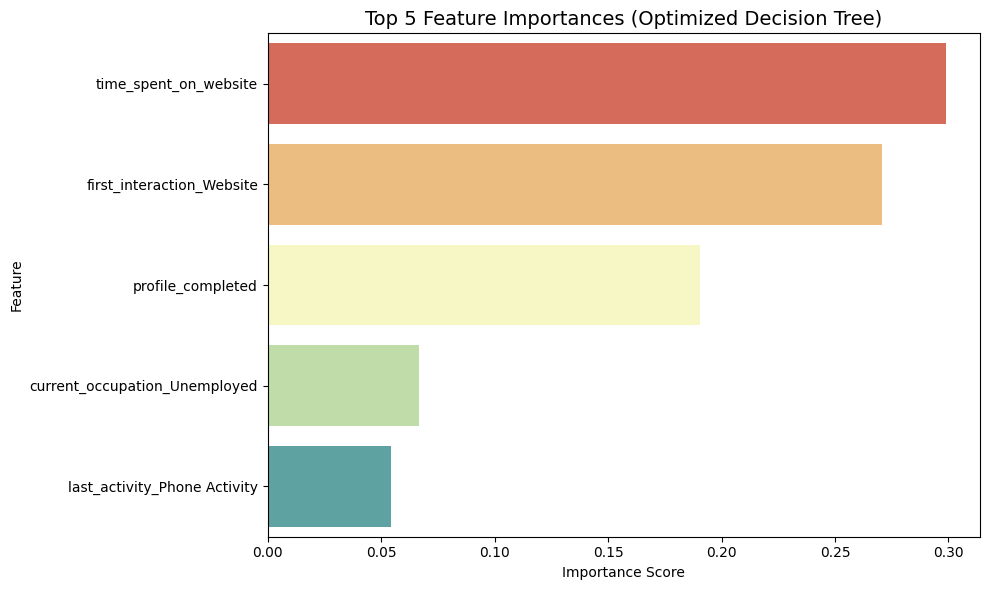

In [ ]:
# Use the trained best estimator from GridSearchCV
best_tree = grid_search.best_estimator_

# Extract feature names and importances
features = X_train.columns
importances = best_tree.feature_importances_

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and select top 5
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df.head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')
plt.title('Top 5 Feature Importances (Optimized Decision Tree)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- This chart highlights the most important features used by the optimized decision tree model. Similar to the non-optimized version, the most influential feature is time spent on the website, followed by first interaction and profile completion.
- However, unlike the previous model, this version identifies current occupation (unemployed) as a key predictor, suggesting that employment status plays a more significant role in the optimized model. The feature last_activity_Phone Activity also appears again, reinforcing the importance of phone-based interactions in lead conversion.

### Final takes on the Decision Tree Model
Comparing the two confusion matrices, the optimized model shows higher overall F1 scores and stronger precision for class 1, though at the cost of lower recall for class 1. At first glance, this might suggest it is the better model. However, in our business context, recall for class 1 (converted leads) is the key metric, since a higher recall reduces false negatives and ensures fewer potential customers are missed. Based on this, the initial model is preferable, with a recall of 85% for class 1 compared to 78% in the second model.

## Building a Random Forest model

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Training Set Performance")

y_pred_train = rf_model.predict(X_train)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nDecision Tree Classification Report:")
print(classification_report(y_train, y_pred_train))

Training Set Performance
Decision Tree Confusion Matrix:
[[2586    0]
 [   1 1102]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



The Random Forest Classifier shows perfect (100%) performance on the training set, which is a strong indication of overfitting. This overfitting will need to be addressed in the next steps to ensure the model performs reliably on unseen data.

In [ ]:
print("Test Set Performance")
y_pred_tree = rf_model.predict(X_test)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Test Set Performance
Decision Tree Confusion Matrix:
[[607  42]
 [ 83 191]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.82      0.70      0.75       274

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



The drop in model performance from 100% on the training set to 86% on the test set confirms our assumption of overfitting. Although the model could benefit from further tuning, this still represents a strong overall performance.

The model also performs well on class 1 (converted leads), achieving an F1 score of 75%, with precision at 82% and recall at 70%. This indicates that while the model is good at identifying true converters, there's some room for improvement in capturing all potential conversions.

/tmp/ipython-input-3475698919.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')


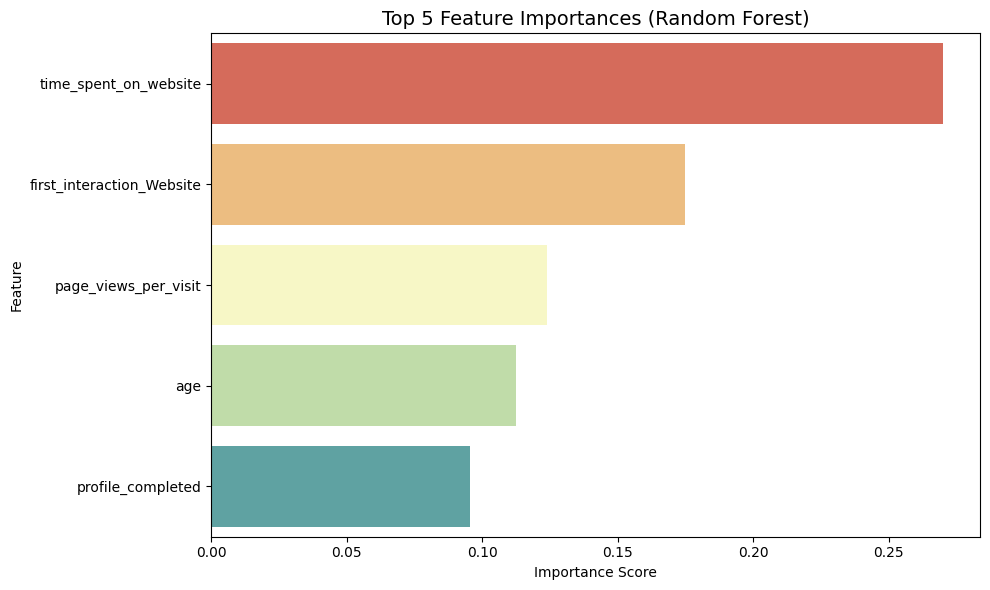

In [ ]:
# Use the trained Random Forest model
features = X_train.columns
importances = rf_model.feature_importances_

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and select top 5
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df.head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Spectral')
plt.title('Top 5 Feature Importances (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- This chart highlights the most important features identified by the Random Forest model. Similar to the previous models, time spent on the website and first interaction via the website remain the most influential indicators of lead conversion.
- Notably, a new feature emerges in third place — page views per visit — suggesting that browsing depth may also be a strong signal of user interest. This is followed by age and profile completion, both of which continue to contribute meaningfully to the prediction of paid customers.

## Model Performance evaluation and improvement

In [ ]:

# Define minimal parameter grid
param_grid = {
    'n_estimators': [100, 200],               # Number of trees
    'max_depth': [10, 15],                    # Tree depth
    'min_samples_split': [2, 5],              # Min samples to split a node
    'min_samples_leaf': [1, 2],               # Min samples at a leaf node
    'max_features': ['sqrt', 'log2'],         # Number of features to consider
    'bootstrap': [True, False]                # Use bootstrap samples
}

'''
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }
'''

# Initialize Random Forest model
#rf_model = RandomForestClassifier(random_state=42)

rf_model = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"
)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Extract best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
# Predict on training and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Training set evaluation
print("=== Training Set Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# Test set evaluation
print("\n=== Test Set Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


=== Training Set Evaluation ===
Confusion Matrix:
 [[2338  248]
 [ 112  991]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2586
           1       0.80      0.90      0.85      1103

    accuracy                           0.90      3689
   macro avg       0.88      0.90      0.89      3689
weighted avg       0.91      0.90      0.90      3689


=== Test Set Evaluation ===
Confusion Matrix:
 [[582  67]
 [ 51 223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       649
           1       0.77      0.81      0.79       274

    accuracy                           0.87       923
   macro avg       0.84      0.86      0.85       923
weighted avg       0.87      0.87      0.87       923



- The optimized Random Forest model demonstrates strong and consistent performance across both the training and test sets. On the training set, the model achieves an accuracy of 90%. Its performance on class 1 is particularly strong, with an F1 score of 85%, a precision of 80%, and a recall of 90%. These metrics suggest that the model captures patterns in the data effectively without overfitting, unlike the initial version. It accurately identifies paid leads while maintaining a good balance between correctly predicting conversions and minimizing false positives.
- On the test set, the model achieves an accuracy of 87%. It continues to perform well on class 1, with a precision of 77%, a recall of 81%, and an overall F1 score of 79%. While there's a drop in recall compared to the training set, the model still performs robustly on unseen data. It successfully captures the majority of paid customers while keeping the false positive rate low. The difference between training and test performance is modest, indicating mild overfitting, but overall the model generalizes well and is reliable for deployment.

## Actionable Insights and Recommendations

- Based on the performance of the models tested, the initial Decision Tree model emerges as the most suitable choice for deployment. Our objective is to build a model that accurately identifies leads who are likely to convert into paid customers, making performance on class 1 (converted leads) especially important.
- The Decision Tree achieves a strong F1 score of 78% on class 1, with a balanced precision and recall. In comparison, while the optimized Random Forest demonstrates higher overall precision, it exhibits a strong bias toward the majority class (non-converted leads) and performs worse in terms of recall for class 1 — which is a critical metric for our business case. This bias, coupled with a modest increase in complexity and reduced interpretability, makes the Random Forest less aligned with our goals.
- The Decision Tree model, on the other hand, is not only more interpretable and transparent (an advantage for operational teams), but also better aligned with the core business need: identifying high-potential leads. Therefore, we recommend moving forward with the Decision Tree as the final model.

Based on feature importance and model interpretation, we can outline a data-driven profile of leads who are most likely to become paying customers:

- Time Spent on Website: The strongest predictor across models — leads who spend more time browsing the site are more engaged and more likely to convert.
- First Interaction via Website: Leads whose first interaction with ExtraaLearn occurred through the website (rather than the mobile app) have higher conversion rates.
- High Profile Completion: Users who complete a large portion of their profile are more committed and informed, indicating a higher intent to enroll.
- Page Views per Visit: Those who browse more pages per session show greater curiosity and engagement with the platform.
- Age: Certain age groups (likely 30–45) are more inclined to convert, possibly reflecting career-focused learners.
- Occupation: Professionals and those who are unemployed (possibly looking to upskill or reskill) appear more likely to convert than students.

- Marketing teams can prioritize users who meet this conversion profile for targeted outreach and retargeting.
- Sales representatives can focus follow-ups on leads showing high engagement and complete profiles.
- Product and UX teams can work to guide users toward the behaviors most predictive of conversion, such as spending time on program pages or completing their profile.